In [33]:
# Example of various pivpy methods
import sys
import pathlib
import subprocess
import importlib.util

print(f'Python executable: {sys.executable}')
print(f'Working directory: {pathlib.Path.cwd().resolve()}')

spec = importlib.util.find_spec('pivpy')
repo_root = None

if spec is None:
    # 1) Try importing directly from the repo checkout by adding it to sys.path (works immediately).
    cwd = pathlib.Path.cwd().resolve()
    for p in [cwd] + list(cwd.parents):
        if (p / 'pyproject.toml').exists() and (p / 'pivpy').is_dir():
            repo_root = p
            break
    if repo_root is not None:
        sys.path.insert(0, str(repo_root))
        print(f'Added repo root to sys.path: {repo_root}')
        spec = importlib.util.find_spec('pivpy')

if spec is None:
    # 2) Fallback: install editable into this kernel (may require kernel restart to take effect).
    print('pivpy still not importable; attempting editable install (may require kernel restart)...')
    if repo_root is None:
        raise RuntimeError('Could not locate repo root (pyproject.toml). Open this notebook from inside the pivpy repository.')
    try:
        subprocess.check_call([sys.executable, '-m', 'pip', '--version'])
    except Exception:
        subprocess.check_call([sys.executable, '-m', 'ensurepip', '--upgrade'])
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-e', str(repo_root)])
    spec = importlib.util.find_spec('pivpy')

print('pivpy importable:', spec is not None)
if spec is not None:
    import pivpy
    print('pivpy version:', getattr(pivpy, '__version__', 'unknown'))
print(f"Python version: {sys.version}")
print(f"Python executable: {sys.executable}")
print("\nChecking installed packages:")

pivpy_spec = importlib.util.find_spec('pivpy')
if pivpy_spec is None:
    print('pivpy: NOT INSTALLED in this kernel')
else:
    import pivpy
    print(f"pivpy version: {getattr(pivpy, '__version__', 'installed (version unavailable)')}")

try:
    print(f"xarray version: {xr.__version__}")
except ImportError:
    print("xarray: NOT INSTALLED")

Python executable: /home/user/Documents/GitHub/pivpy/.venv/bin/python
Working directory: /home/user/Documents/GitHub/pivpy/examples/notebooks
pivpy importable: True
pivpy version: 0.1.0
Python version: 3.13.9 (main, Oct 28 2025, 12:10:42) [Clang 20.1.4 ]
Python executable: /home/user/Documents/GitHub/pivpy/.venv/bin/python

Checking installed packages:
pivpy version: 0.1.0
xarray version: 2025.12.0


In [34]:
import importlib.util
if importlib.util.find_spec('pivpy') is None:
    raise RuntimeError("pivpy is not available in this kernel. Run the install cell above or switch the notebook kernel to pivpy (.venv).")

from pivpy import io, pivpy, graphics
import numpy as np
import xarray as xr
import importlib.resources
import pathlib

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
f1 = 'Run000001.T000.D000.P000.H001.L.vec'
f2 = 'Run000002.T000.D000.P000.H001.L.vec'

# Ensure compatibility with different Python versions (3.9+ has 'files', 3.7 and 3.8 need 'path')
try:
    from importlib.resources import files
except ImportError:
    from importlib.resources import path as resource_path

# For Python 3.9+
try:
    path = files('pivpy') / 'data'
except NameError:
    # For Python 3.7 and 3.8
    with resource_path('pivpy', 'data') as data_path:
        path = data_path

# Convert to pathlib.Path if not already
path = pathlib.Path(path)


a = io.load_vec(path / "Insight" / f1 )
b = io.load_vec(path / "Insight" / f2 )

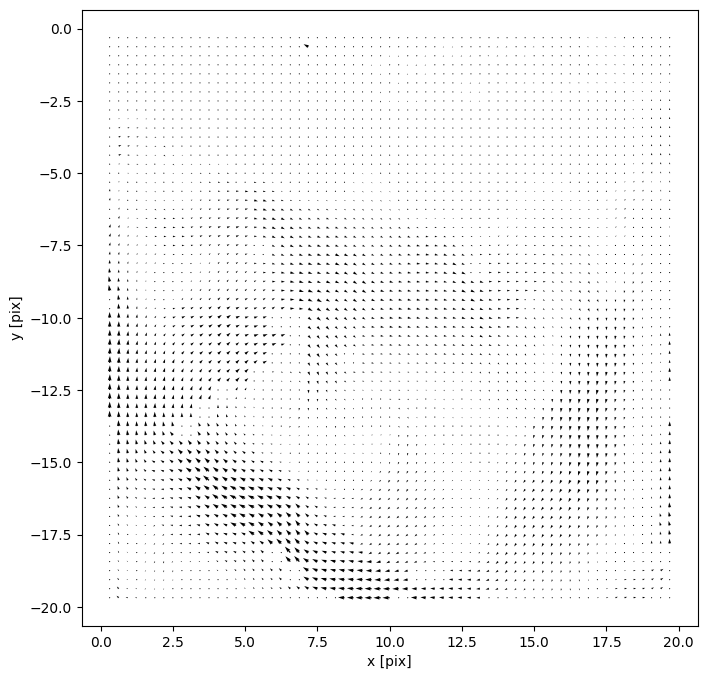

In [36]:
# select where t = 1 (explicit time)
fig, ax = graphics.quiver(a.sel(t=1),scalingFactor=10)

#increase figure size
fig.set_size_inches(11,8)

<Figure size 1100x800 with 0 Axes>

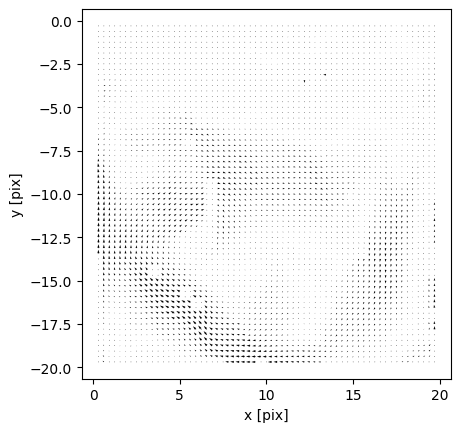

In [37]:
# select just the first frame whatever t is .
b['t'] = b['t'] + 10
# define size before the plot
plt.figure(figsize=(11,8))

# show less vectors using nthArr 
fig, ax = graphics.quiver(b.isel(t=0),scalingFactor=10)

In [38]:
c = a.piv.crop([5, 15,-5,-15])
a.u.shape, c.u.shape

((63, 63, 1), (32, 32, 1))

<Figure size 1100x800 with 0 Axes>

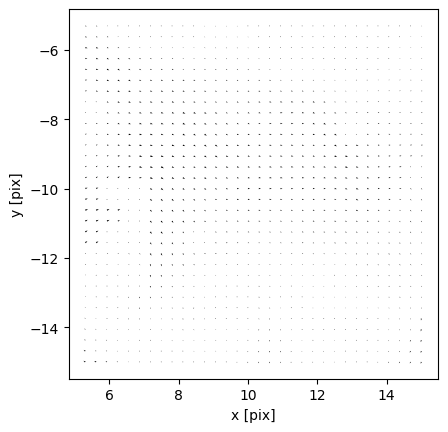

In [39]:
# define size before the plot
plt.figure(figsize=(11,8))

# show less vectors using nthArr 
fig, ax = graphics.quiver(c.isel(t=0),scalingFactor=10)

In [40]:
# let's play with some synthetic data 
c = io.create_sample_Dataset()

In [41]:
# want to slice it and not crop? 
d = c.sel(x = slice(35,70),y=slice(30,90))
print(d)

<xarray.Dataset> Size: 760B
Dimensions:  (y: 7, x: 2, t: 2)
Coordinates:
  * y        (y) float64 56B 30.0 40.0 50.0 60.0 70.0 80.0 90.0
  * x        (x) float64 16B 40.0 60.0
  * t        (t) float64 16B 0.0 1.0
Data variables:
    u        (y, x, t) float64 224B 3.0 3.0 4.0 4.0 3.0 ... 4.0 3.0 3.0 4.0 4.0
    v        (y, x, t) float64 224B 4.0 4.0 4.0 4.0 5.0 ... 10.0 10.0 10.0 10.0
    chc      (y, x, t) float64 224B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes: (2)


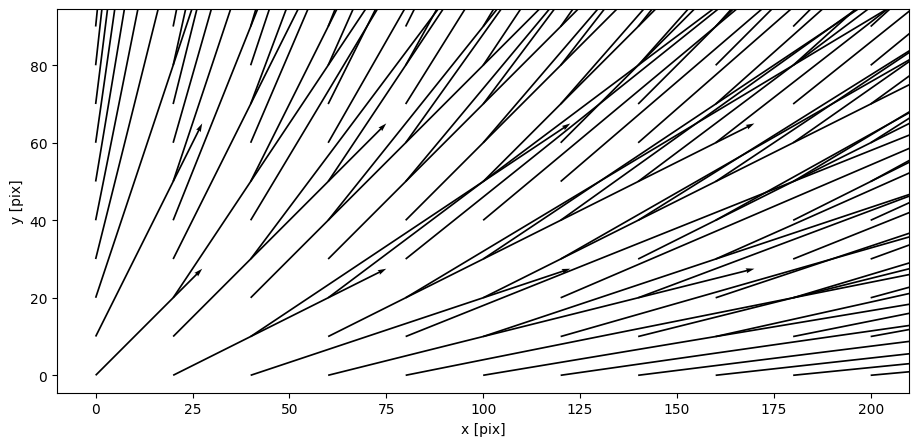

In [44]:
# want to show an ensemble average of 10 frames?
data = io.create_sample_Dataset(10)

# want to change the size of arrows and figure aspectratio?
fig,_=graphics.quiver(data.piv.average,scalingFactor=8)
fig.set_size_inches(11,8)

In [45]:
data = io.create_sample_field()
data.piv.strain()

<xarray.Dataset> Size: 4kB
Dimensions:  (y: 10, x: 11, t: 1)
Coordinates:
  * y        (y) float64 80B 0.0 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0
  * x        (x) float64 88B 0.0 20.0 40.0 60.0 80.0 ... 140.0 160.0 180.0 200.0
  * t        (t) float64 8B 0.0
Data variables:
    u        (y, x, t) float64 880B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0
    v        (y, x, t) float64 880B 1.0 1.0 1.0 1.0 1.0 ... 10.0 10.0 10.0 10.0
    chc      (y, x, t) float64 880B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    w        (y, x, t) float64 880B 0.0125 0.0125 0.0125 ... 0.0125 0.0125
Attributes: (2)

In [46]:
data.piv.vorticity()
data

<xarray.Dataset> Size: 4kB
Dimensions:  (y: 10, x: 11, t: 1)
Coordinates:
  * y        (y) float64 80B 0.0 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0
  * x        (x) float64 88B 0.0 20.0 40.0 60.0 80.0 ... 140.0 160.0 180.0 200.0
  * t        (t) float64 8B 0.0
Data variables:
    u        (y, x, t) float64 880B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0
    v        (y, x, t) float64 880B 1.0 1.0 1.0 1.0 1.0 ... 10.0 10.0 10.0 10.0
    chc      (y, x, t) float64 880B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    w        (y, x, t) float64 880B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (2)